## Importing Libraries

In [1]:
import numpy as np # to deal with numeric problem
import pandas as pd # to work with DataFrame 
import matplotlib.pyplot as plt #to visualize 
import seaborn as sns #to visualize 
from sklearn.preprocessing import StandardScaler #preprocess
from sklearn.cluster import KMeans #model
from sklearn.decomposition import PCA 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering #model
from sklearn.cluster import DBSCAN #model

##  Loading Data

In [2]:

data = pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## DataVisulization

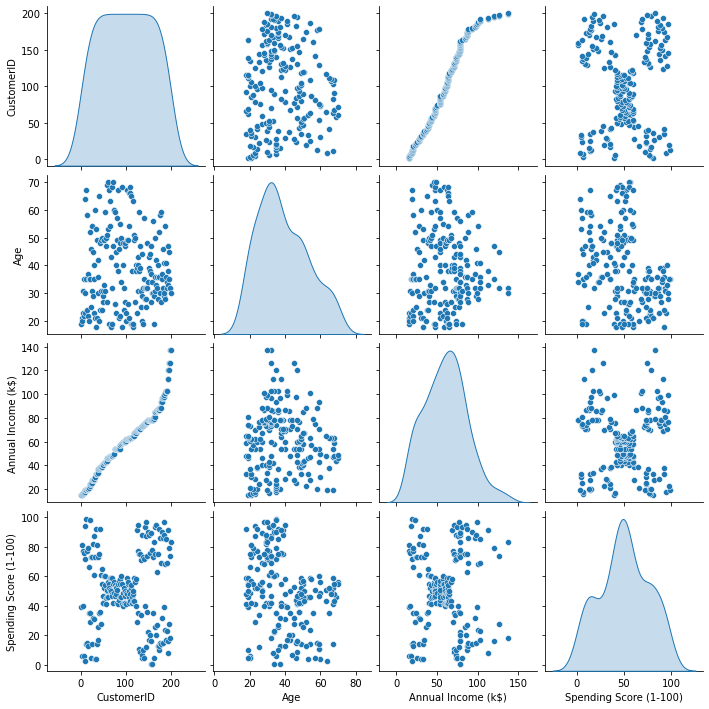

In [3]:
sns.pairplot(data,diag_kind='kde')

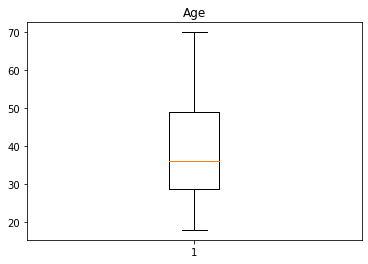

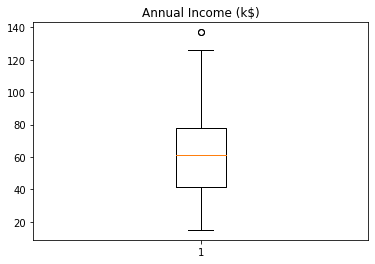

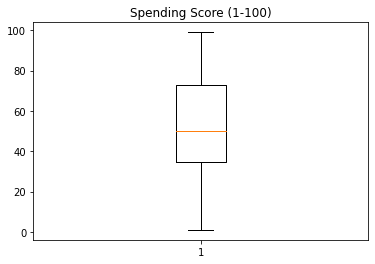

In [4]:
for i in data.columns[2:]:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

### Interpration:

    The Majority of population have Age range 30 - 50
    
    The Majority of population have Annual Income in range $40k - $80k and having few outliers
    
    The Majority of population have Spending Score(1-100) range 30 - 70

## Removing outliers

In [5]:
a=data[data['Annual Income (k$)']>130]
data=data.drop(a.index,axis=0)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


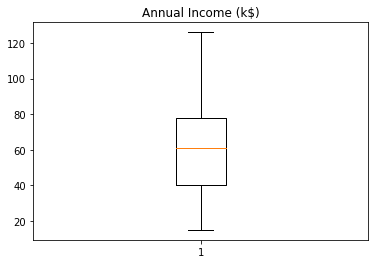

In [6]:
plt.boxplot(data['Annual Income (k$)'])
plt.title('Annual Income (k$)')
plt.show();

<AxesSubplot:xlabel='Gender', ylabel='Count'>

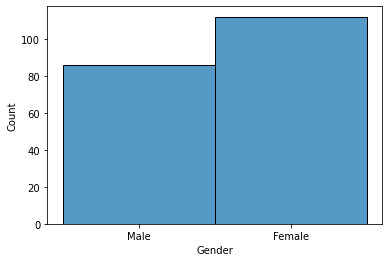

In [7]:
sns.histplot(data,x='Gender')

Maximum Mall Customer are Females

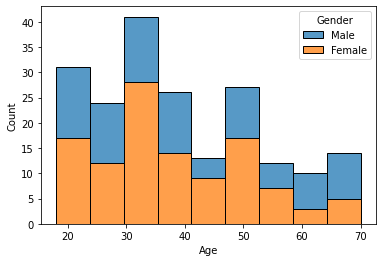

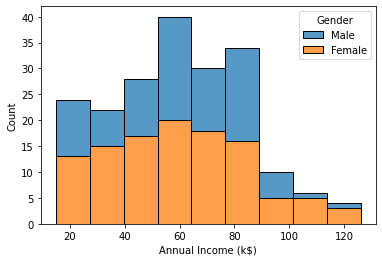

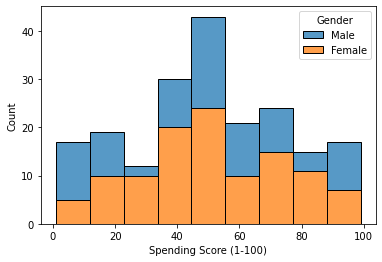

In [8]:
for i in data.columns[2:]:
    sns.histplot(data,x=i,hue='Gender',multiple='stack')
    plt.show()

### Interpration:
    In all Age group Female customers are more than Males

    The Females customers have more Annunal Income as compare to Males

    The Females customers have more Spending Scores as compare to Males

## Columns Name

In [9]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## Preprocessing Data

In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,198.000000,198.000000,198.000000,198.000000
mean,99.500000,38.929293,59.787879,50.196970
std,57.301832,14.016852,25.237259,25.746846
min,1.000000,18.000000,15.000000,1.000000
25%,50.250000,28.250000,40.500000,35.000000
50%,99.500000,36.000000,61.000000,50.000000
75%,148.750000,49.000000,77.750000,72.750000
max,198.000000,70.000000,126.000000,99.000000


There is no huge difference in the scales of Age, Annual Income and Spending Score features, so no need to scale this dataset. 

CustomerID and Gender are irrelevant fields and can be dropped.

In [11]:
data_c=data.copy()
data_c=data_c.drop(['CustomerID','Gender'],axis=1)
data_c

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
193,38,113,91
194,47,120,16
195,35,120,79
196,45,126,28


In [12]:
data_c.dtypes

Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

## PCA

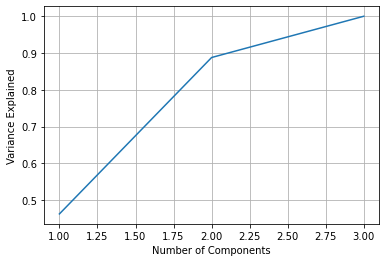

In [13]:
v = []

for n in range(1,4):
    pca = PCA(n_components=n)
    pca.fit(data_c)
    
    v.append(sum(pca.explained_variance_ratio_))
    
plt.plot(range(1,4),v)
plt.grid()
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

## Modelling

### KMeans

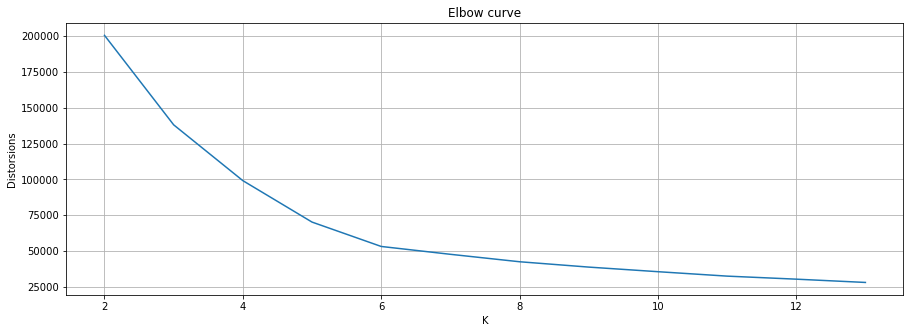

In [14]:
dis = []
for k in range(2, 14):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_c)
    dis.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 14), dis)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

In [15]:
#pip install yellowbrick

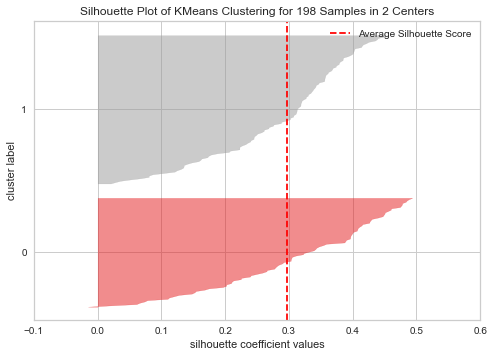

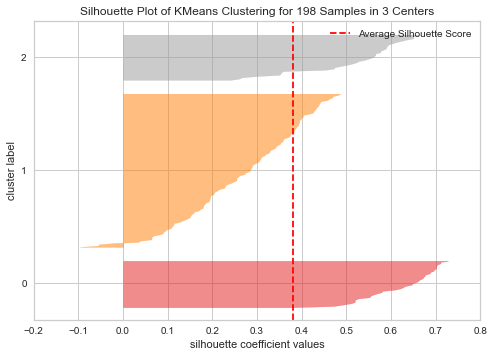

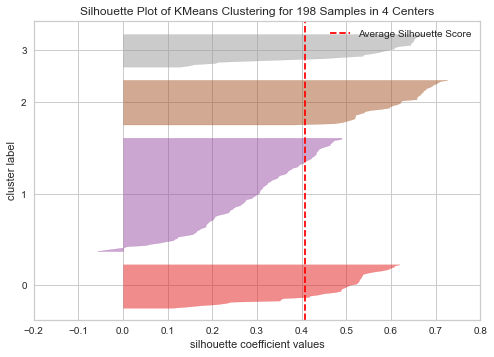

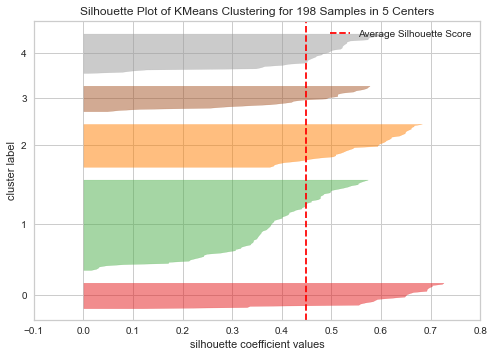

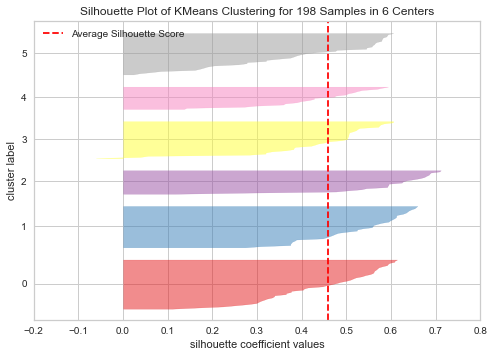

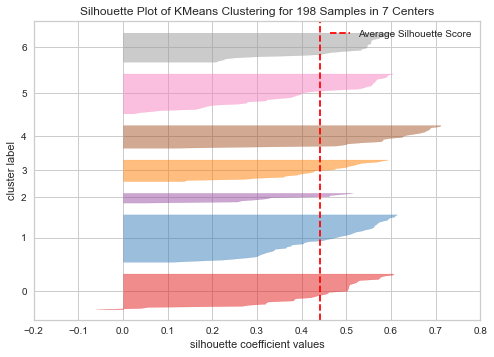

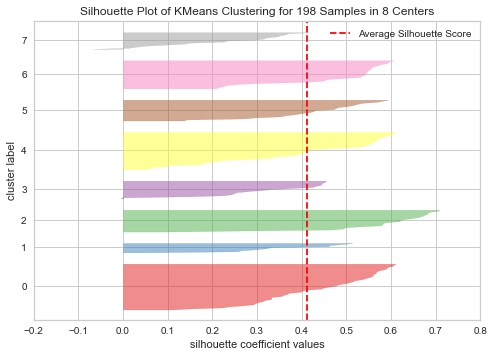

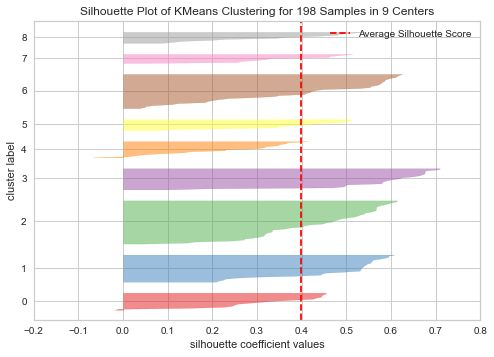

In [16]:
from yellowbrick.cluster import silhouette_visualizer

for i in range(2,10):
    silhouette_visualizer(KMeans(i, random_state=777), data_c)

C:\Users\PSY\AppData\Local\Temp\ipykernel_9104\2262606613.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.cluster[data.cluster == 0] = 'Careful'


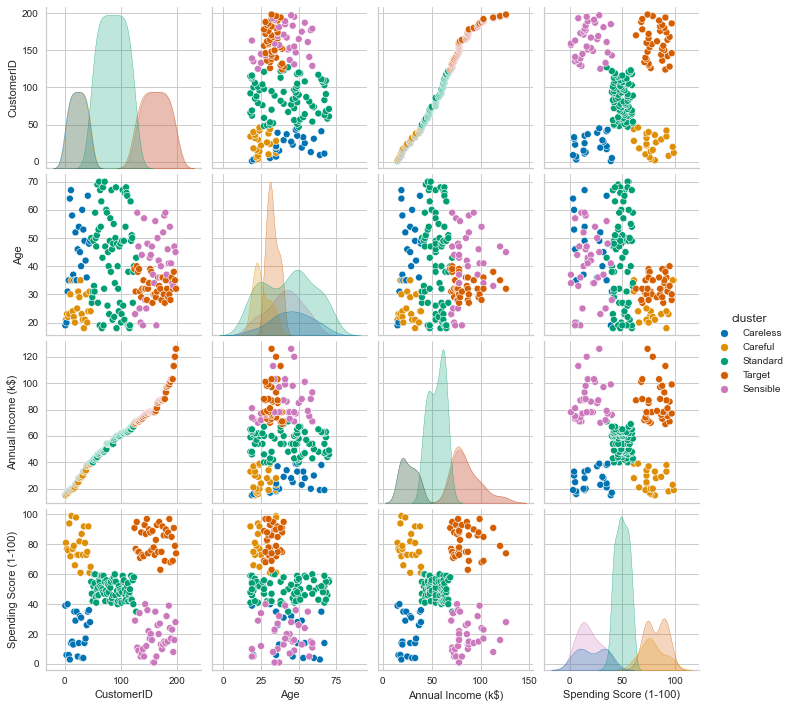

In [17]:
km=KMeans(n_clusters=5)
y_pred=km.fit_predict(data_c)

data['cluster']=y_pred

data.cluster[data.cluster == 0] = 'Careful'
data.cluster[data.cluster == 1] = 'Standard'
data.cluster[data.cluster == 2] = 'Target'
data.cluster[data.cluster == 3] = 'Careless'
data.cluster[data.cluster == 4] = 'Sensible'

sns.pairplot(data,hue='cluster',diag_kind='kde',palette='colorblind')

### DBSCAN

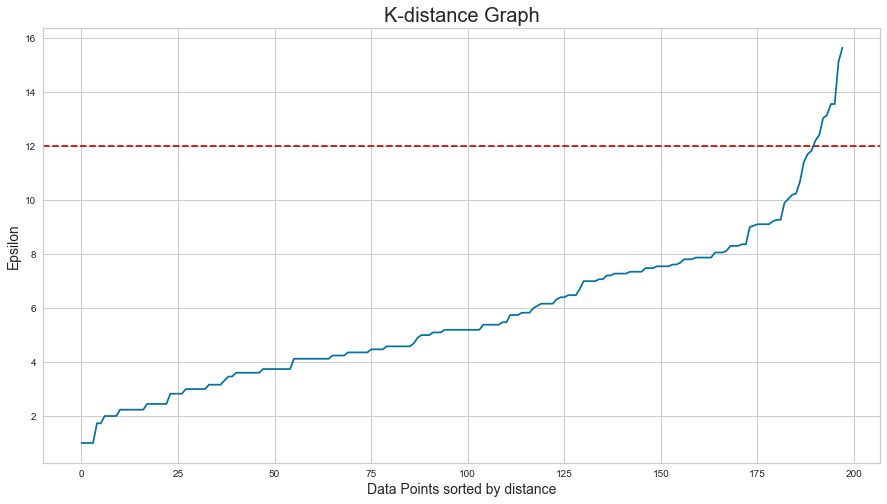

In [18]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_c)
distances, indices = nbrs.kneighbors(data_c)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=12, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [19]:

for i in range(2,30):
    clusterer = DBSCAN(eps=12, min_samples=i)
    cluster_labels = clusterer.fit_predict(data_c)

    X= cluster_labels +2
    y = np.bincount(X)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',12,'| min_samples= ', i, '| obtained clustering: ', results)

eps= 12 | min_samples=  2 | obtained clustering:  [(1, 8), (2, 102), (3, 16), (4, 2), (5, 2), (6, 34), (7, 3), (8, 23), (9, 4), (10, 2), (11, 2)]
eps= 12 | min_samples=  3 | obtained clustering:  [(1, 16), (2, 102), (3, 16), (4, 34), (5, 23), (6, 3), (7, 4)]
eps= 12 | min_samples=  4 | obtained clustering:  [(1, 24), (2, 101), (3, 7), (4, 8), (5, 34), (6, 20), (7, 4)]
eps= 12 | min_samples=  5 | obtained clustering:  [(1, 34), (2, 101), (3, 6), (4, 6), (5, 34), (6, 17)]
eps= 12 | min_samples=  6 | obtained clustering:  [(1, 57), (2, 97), (3, 32), (4, 12)]
eps= 12 | min_samples=  7 | obtained clustering:  [(1, 59), (2, 16), (3, 79), (4, 32), (5, 12)]
eps= 12 | min_samples=  8 | obtained clustering:  [(1, 59), (2, 15), (3, 80), (4, 32), (5, 12)]
eps= 12 | min_samples=  9 | obtained clustering:  [(1, 66), (2, 14), (3, 79), (4, 30), (5, 9)]
eps= 12 | min_samples=  10 | obtained clustering:  [(1, 81), (2, 12), (3, 75), (4, 30)]
eps= 12 | min_samples=  11 | obtained clustering:  [(1, 81), (2

C:\Users\PSY\AppData\Local\Temp\ipykernel_9104\3531240270.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.cluster[data.cluster == -1] = 'Occasional'


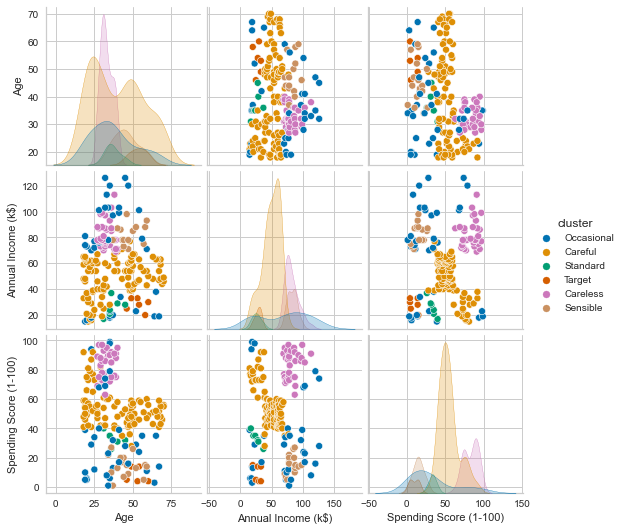

In [20]:
db_o=DBSCAN(eps=12,min_samples=5)
db_o.fit(data_c)
y_db=db_o.labels_
data['cluster']=y_db

data.cluster[data.cluster == -1] = 'Occasional'
data.cluster[data.cluster == 0] = 'Careful'
data.cluster[data.cluster == 1] = 'Standard'
data.cluster[data.cluster == 2] = 'Target'
data.cluster[data.cluster == 3] = 'Careless'
data.cluster[data.cluster == 4] = 'Sensible'

sns.pairplot(data.iloc[:,1:],hue='cluster',diag_kind='kde',palette='colorblind');

### AgglomerativeClustering

##### Plotting Dendogram

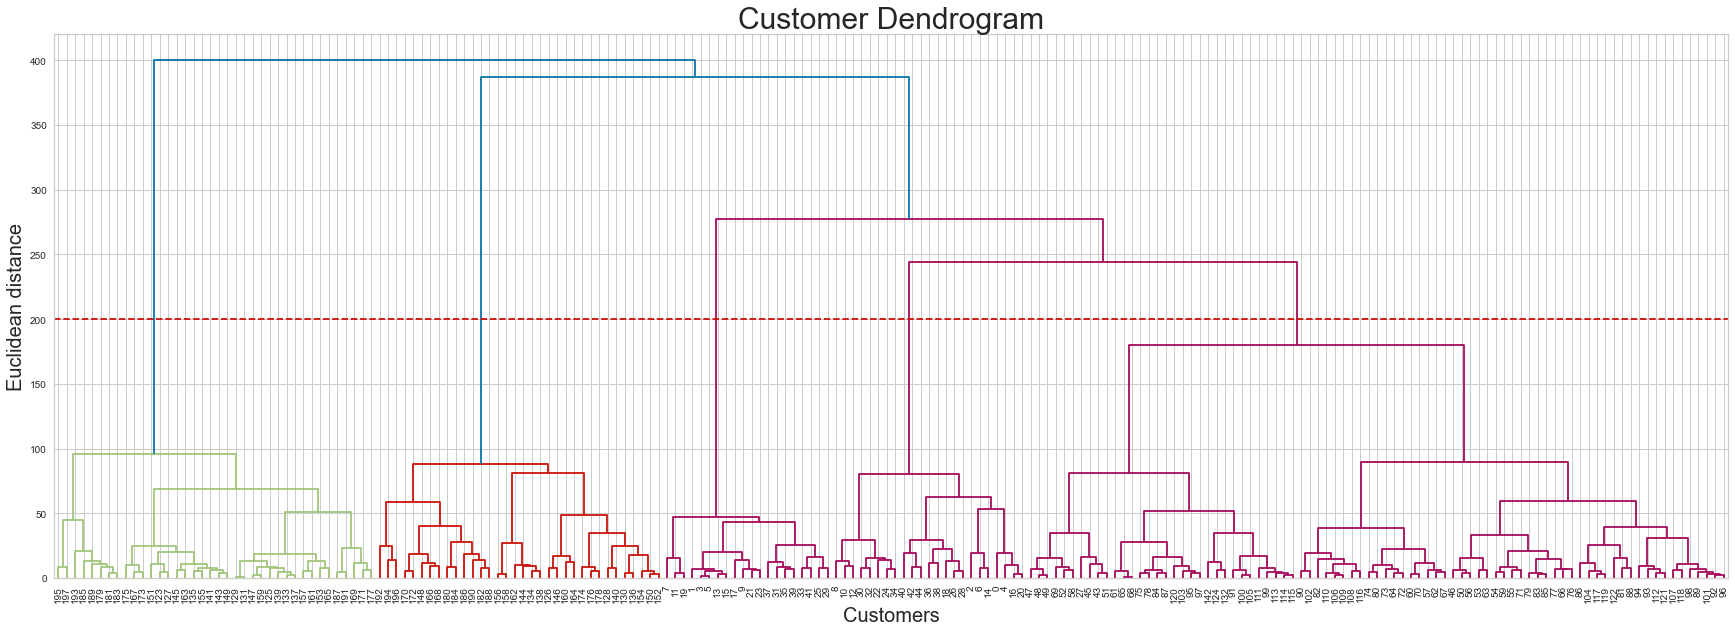

In [21]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(data_c, method = 'ward'),labels=data_c.index)
plt.axhline(y=200, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In our case, it's 5. So let's fit the Agglomerative model with 5 clusters.

C:\Users\PSY\AppData\Local\Temp\ipykernel_9104\2687706973.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.cluster[data.cluster == 0] = 'Careful'


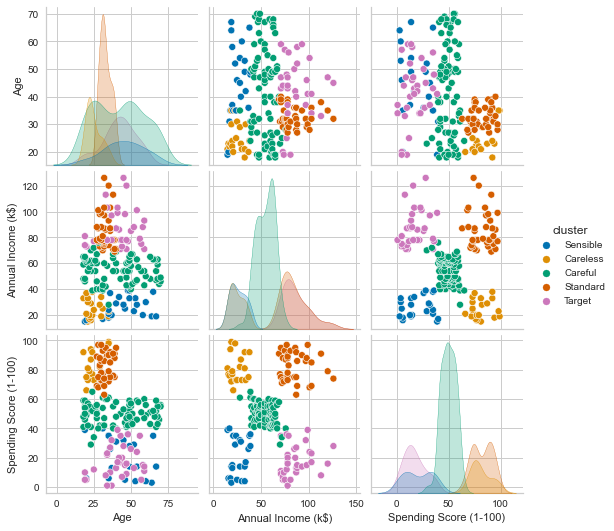

In [22]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_c)

data['cluster'] = y_hc

data.cluster[data.cluster == 0] = 'Careful'
data.cluster[data.cluster == 1] = 'Standard'
data.cluster[data.cluster == 2] = 'Target'
data.cluster[data.cluster == 3] = 'Careless'
data.cluster[data.cluster == 4] = 'Sensible'

sns.pairplot(data.iloc[:,1:],hue='cluster',palette='colorblind')

In [23]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,Sensible
1,2,Male,21,15,81,Careless
2,3,Female,20,16,6,Sensible
3,4,Female,23,16,77,Careless
4,5,Female,31,17,40,Sensible
...,...,...,...,...,...,...
193,194,Female,38,113,91,Standard
194,195,Female,47,120,16,Target
195,196,Female,35,120,79,Standard
196,197,Female,45,126,28,Target


## Types of Customers

#### Sensible

In [24]:
dff=data.groupby('cluster')

dff.get_group('Sensible').head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,Sensible
2,3,Female,20,16,6,Sensible
4,5,Female,31,17,40,Sensible
6,7,Female,35,18,6,Sensible
8,9,Male,64,19,3,Sensible


#### Standard

In [25]:
dff.get_group('Standard').head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
123,124,Male,39,69,91,Standard
125,126,Female,31,70,77,Standard
127,128,Male,40,71,95,Standard
129,130,Male,38,71,75,Standard
131,132,Male,39,71,75,Standard


#### Target

In [26]:
dff.get_group('Target').head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
126,127,Male,43,71,35,Target
128,129,Male,59,71,11,Target
130,131,Male,47,71,9,Target
134,135,Male,20,73,5,Target
136,137,Female,44,73,7,Target


#### Careless

In [27]:
dff.get_group('Careless').head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
1,2,Male,21,15,81,Careless
3,4,Female,23,16,77,Careless
5,6,Female,22,17,76,Careless
7,8,Female,23,18,94,Careless
9,10,Female,30,19,72,Careless


#### Careful

In [28]:
dff.get_group('Careful').head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
27,28,Male,35,28,61,Careful
43,44,Female,31,39,61,Careful
45,46,Female,24,39,65,Careful
46,47,Female,50,40,55,Careful
47,48,Female,27,40,47,Careful


## Insights

* Count of Male Customers is comparatively less than Female Customers
* Most of the customers age range in between 30-50 years
* Wide range of customer income range in between dollar 40-80k per annum.
* Most of the customers spending score is in between 30-70
* Major Customers is in the age of 30-35 with annual income dollar 60-80k anually and there spending score lie between 45-55
* Spending Score decrease as the age increase max spending score can be seen for the customers whose age is somewhere around 38
* As we can see Anuual income does not have much impact on spending score however customers who have annual income between 70-75K have higher spending score
* Females are less with low spending and very high spending score however there are more Females then males with medium spending Score
* Females count is high in the age range 30-50
* Below 50K annual income females count is high after that males are more than females who earn more then 50k annually
* Spending Score decrease as the age increase max spending score can be seen for the customers whose age is somewhere around 30 and 40 for both male and Females
* Females with Very-Less/Very-High income have high spending score as compair to males